In [63]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm

import enzope

In [4]:
def mean_exchange(r1, wi, rj, wj):
    return (wi + wj) / 2
def constant_exchange(r1, wi, rj, wj):
    return .0001

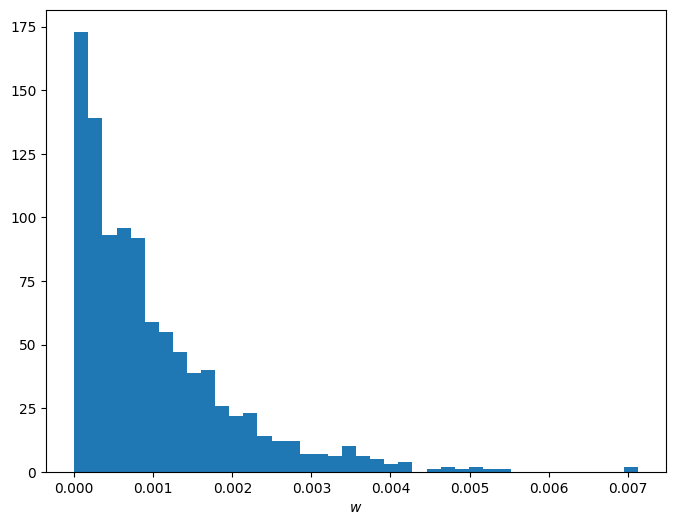

In [3]:
model = enzope.CPUModel(n_agents=1000, interaction=mean_exchange)
model.MCS(5000)
fig = enzope.distribution(model.w, bins=40)

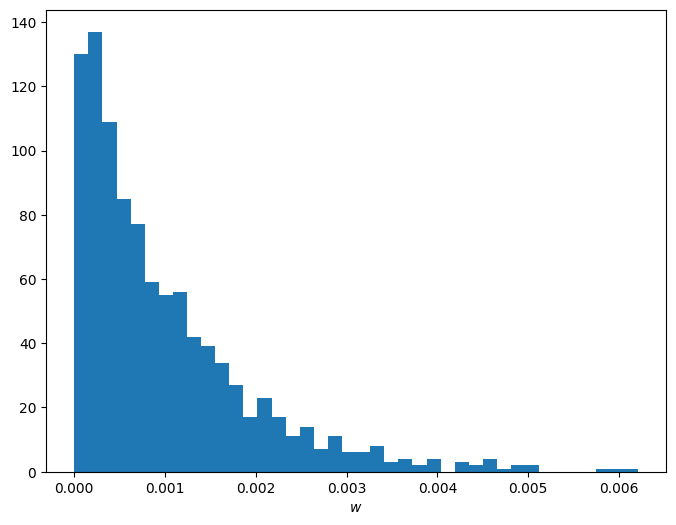

In [5]:
model = enzope.CPUModel(n_agents=1000, interaction=constant_exchange)
model.MCS(5000)
fig = enzope.distribution(model.w, bins=40)

In [69]:
def run_simulation(mcs=1000, r_frac=.7, f=.1, reps=10):
    gini1 = []
    gini2 = []
    for rep in tqdm(range(reps)):
        model1 = enzope.CPUModel(n_agents=500, f=f, measure_every=1)
        model2 = enzope.CPUModel(n_agents=500, f=f, measure_every=1)
        model2.r = np.random.uniform(0, r_frac, size=model2.n_agents)
        model1.MCS(mcs)
        model2.MCS(mcs)
        gini1.append(model1.gini)
        gini2.append(model2.gini)

    mean_1 = np.mean(gini1, axis=0)
    mean_2 = np.mean(gini2, axis=0)
    std_1 = np.std(gini1, axis=0)
    std_2 = np.std(gini2, axis=0)

    return mean_1, mean_2, std_1, std_2
    

In [70]:
gini1, gini2, std1, std2 = run_simulation(mcs=50000, r_frac=.7, f=.1, reps=10)

100%|██████████| 10/10 [43:25<00:00, 260.51s/it]


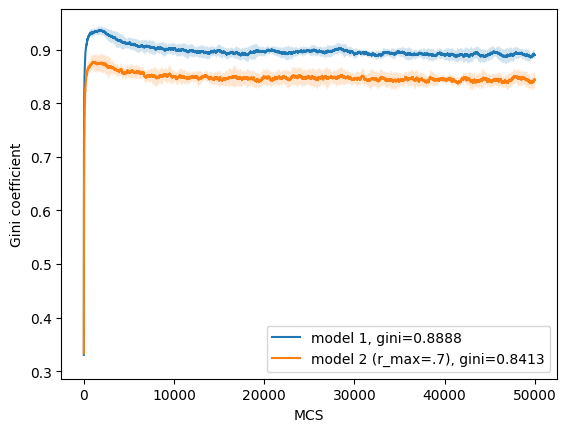

In [74]:
# plot model ginis
fig, ax = plt.subplots()
ax.plot(gini1, label=f'model 1, gini={np.mean(gini1[-1000:]):.4f}')
ax.fill_between(range(len(gini1)), gini1-std1, gini1+std1, alpha=.2)
ax.plot(gini2, label=f'model 2 (r_max=.7), gini={np.mean(gini2[-1000:]):.4f}')
ax.fill_between(range(len(gini2)), gini2-std2, gini2+std2, alpha=.2)
ax.legend()
ax.set_xlabel('MCS')
ax.set_ylabel('Gini coefficient');
fig.savefig('figs/gini.png', dpi=300)